### SAADHANA SRINATH
Face Mask Detector 

Dataset used - GTSRB dataset

In [1]:
## importing the dependencies

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import os

%matplotlib inline

##### Data Handling

In [2]:
## Retrieving the images and their labels

p = 0
data = []
labels = []

print("Obtaining Images & its Labels..............\n")
for i in range(2):
    path = os.path.join('FaceMask Dataset',str(i))
    images = os.listdir(path)
    
    for a in images:
        img_path = os.path.join(path,a)
        img = cv2.imread(img_path)
        
        try:            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized = cv2.resize(gray,(100,100))
            ## for uniformity
            data.append(resized)
            labels.append(i)
            p+=1
            print(p,end=" ")
            
        except Exception as e:
            print("Error loading image",e)
            
print("\n\nDataset Loaded")


Obtaining Images & its Labels..............

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266

In [3]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],100,100,1))
target = np.array(labels)

target = to_categorical(target,2)


# np.shape(data) --> (108, 100, 100, 1)
# np.shape(target) -->(108, 2)

##### Building the model

In [4]:
model = Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Dropout(0.5))
model.add(Conv2D(50,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(10,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


##### Training the model

In [5]:
## Performing the Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.25,random_state=42)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))


(1140, 100, 100, 1)
(380, 100, 100, 1)
(1140, 2)
(380, 2)


In [6]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
model.save("Mask1.h5")

Epoch 1/20
36/36 [==============================] - 27s 743ms/step - loss: 0.7103 - accuracy: 0.5088 - val_loss: 0.6919 - val_accuracy: 0.5184
Epoch 2/20
36/36 [==============================] - 33s 903ms/step - loss: 0.6731 - accuracy: 0.5456 - val_loss: 0.6488 - val_accuracy: 0.5605
Epoch 3/20
36/36 [==============================] - 33s 927ms/step - loss: 0.5854 - accuracy: 0.6833 - val_loss: 0.5193 - val_accuracy: 0.7447
Epoch 4/20
36/36 [==============================] - 33s 933ms/step - loss: 0.4524 - accuracy: 0.7974 - val_loss: 0.4227 - val_accuracy: 0.8237
Epoch 5/20
36/36 [==============================] - 33s 928ms/step - loss: 0.3375 - accuracy: 0.8509 - val_loss: 0.3286 - val_accuracy: 0.8526
Epoch 6/20
36/36 [==============================] - 33s 918ms/step - loss: 0.2845 - accuracy: 0.8825 - val_loss: 0.2801 - val_accuracy: 0.8947
Epoch 7/20
36/36 [==============================] - 32s 907ms/step - loss: 0.2558 - accuracy: 0.8921 - val_loss: 0.2649 - val_accuracy: 0.8974

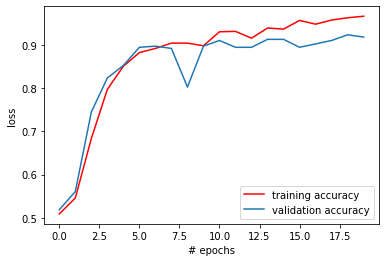

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

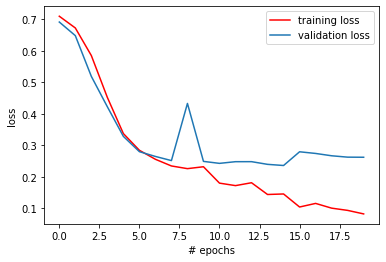

In [8]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(X_test,y_test))

12/12 [==============================] - 1s 110ms/step - loss: 0.2623 - accuracy: 0.9184
[0.26233139634132385, 0.9184210300445557]


##### Using the model for predictions

In [10]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [11]:
model = load_model('Mask1.h5')

dict1 = {0:'MASKED :)',1:'UNMASKED :('}
dict2 = {0:(0,255,0),1:(0,0,255)}
x,y,w,h,flg = 0,0,0,0,0

classifier = cv2.CascadeClassifier(r'C:\Users\hp\anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)

while(True):

    _,img = cam.read()
    img = cv2.flip(img,1)
    flg = 0
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray,1.3,5)  
    
    for x,y,w,h in faces:
    
        face_img = gray[y:y+w,x:x+w]
        resized = cv2.resize(face_img,(100,100))
        normalized = resized/255.0
        reshaped = np.reshape(normalized,(1,100,100,1))
        result = model.predict(reshaped)

        flg = np.argmax(result,axis=1)[0]
                
        cv2.rectangle(img,(x,y),(x+w,y+h),dict2[flg],2)        
        cv2.putText(img,dict1[flg],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,dict2[flg],2)
    
    if flg != 1:
        cv2.rectangle(img,(x,y),(x+w,y+h),dict2[0],2)        
        cv2.putText(img,dict1[0],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,dict2[0],2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
cam.release()